# Приоритизация гипотез и анализ A/B-теста


Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Приоритизация гипотез

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
from IPython.display import display
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth
import datetime as dt

hypothesis= pd.read_csv('/datasets/hypothesis.csv')


hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [2]:
hypothesis['ICE']=(
    hypothesis['Impact']*hypothesis['Confidence']
)/hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [3]:
hypothesis['RICE']=(
    hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']
)/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-info">
<b></b>      
Приоритизация гипотез при применении RICE вместо ICE изменилась. Это произошло из-за влияния охвата пользователей.
    
Гипотеза № 7 вышла вперед, т.к. у нее максимальный охват пользователей - 10 баллов.   
</div>

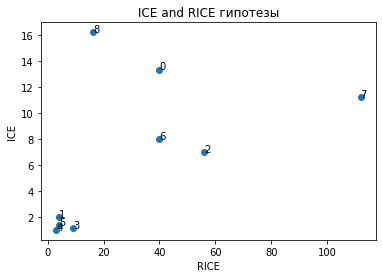

In [4]:
y = hypothesis['ICE'] #шкала y
z = hypothesis['RICE'] #цифра рядом с точкой   
n = hypothesis.index #номер гипотезы

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE"); 

<div class="alert alert-info">
<b></b>      
Приоритизация гипотез при применении RICE вместо ICE изменилась.
    
Гипотеза № 8 сдала позиции, а № 7 наоборот - лидер по значимости.    
    
Значимость у гипотез № 1,3,4,5 не изменилась, осталась низкой.
</div>

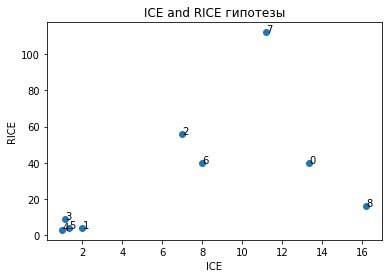

In [5]:
y = hypothesis['ICE'] #шкала y
z = hypothesis.index #номер гипотезы
n = hypothesis['RICE'] #цифра рядом с точкой

fig, ax = plt.subplots()
ax.scatter(y, n)

for i, txt in enumerate(z):
    ax.annotate(txt, (y[i], n[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("ICE") 
plt.ylabel("RICE"); 

## Изучение данных из файлов - визиты, заказы

### Заказы

In [6]:
orders= pd.read_csv('/datasets/orders.csv')
#transactionId — идентификатор заказа
#visitorId — идентификатор пользователя, совершившего заказ


orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders = orders.drop_duplicates().reset_index(drop=True)

orders = orders.rename(columns=
                   {
                       'transactionId': 'orderId',
                       'visitorId': 'userId',
                   }
                  )
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
orderId    1197 non-null int64
userId     1197 non-null int64
date       1197 non-null datetime64[ns]
revenue    1197 non-null int64
group      1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
user_groups_count = orders.groupby('userId')['group'].nunique()
bad_users = user_groups_count[user_groups_count > 1]
len(bad_users)

display(bad_users.head())
b=bad_users.index
b

userId
8300375      2
199603092    2
232979603    2
237748145    2
276558944    2
Name: group, dtype: int64

Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
            2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
            2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
            2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
            3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
            3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
            3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
            4186807279, 4256040402, 4266935830],
           dtype='int64', name='userId')

In [9]:
orders=orders[np.logical_not(orders['userId'].isin(b))]
len(orders)

1016

<div class="alert alert-info">
<b></b>  
    
Столбец с датами переведен в нужный формат, в таблице дубликатов и пустых значений нет.
</div>

### Визиты

In [10]:
visitors= pd.read_csv('/datasets/visitors.csv')
#visitors — количество пользователей в указанную дату в указанной группе A/B-теста


visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = visitors.drop_duplicates().reset_index(drop=True)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-info">
<b></b>  
    
Столбец с датами переведен в нужный формат, в таблице дубликатов и пустых значений нет.
</div>

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [13]:
#Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, 
#а группа теста равна группе из datesGroups
#Агрегируем значения. Вычислим максимальную дату. Найдём число уникальных ID заказов и пользователей. 
#Подсчитаем сумму чеков
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group']
                                   )]\
.agg(
        {'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group']) 
ordersAggregated.head()

,date,group,orderId,userId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group']
                                     )].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


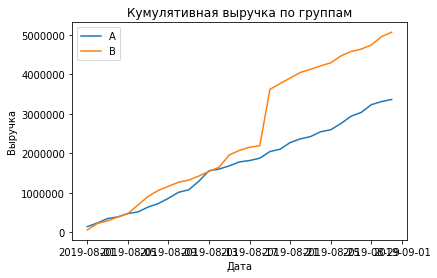

In [16]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.title("Кумулятивная выручка по группам") 
plt.xlabel("Дата") 
plt.ylabel("Выручка");

<div class="alert alert-info">
<b> </b>  
    
Выручка увеличивается в течение всего теста в обеих группах. Хороший знак.
Однако график выручки группы В в одной точке резко растет, а дальше с таким же коэффициентом увеличивается как и в А. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке в определенный период.   
</div>

### График кумулятивного среднего чека по группам

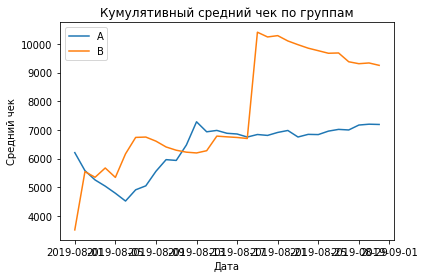

In [17]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Кумулятивный средний чек по группам") 
plt.xlabel("Дата") 
plt.ylabel("Средний чек");
plt.show()



<div class="alert alert-info">
<b></b>  
Средний чек группы А после снижения идет резко вверх и после небольшого снижения устанавливается равномерно.
    
Средний чек группы В растет рывками, причем последний рывок достаточно резкий, а далее идет снижение.
    
Возможно, в группу B переодически попадали крупные заказы. Но после этих заказов средний чек каждый раз падает.
    
Средний кумулятивный чек группы В выше в большей части времени.   
</div>

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()


,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


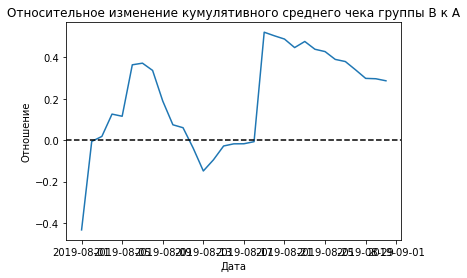

In [19]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Относительное изменение кумулятивного среднего чека группы В к А") 
plt.xlabel("Дата") 
plt.ylabel("Отношение");

plt.show()

<div class="alert alert-info">
<b></b>  
В нескольких точках график отношения средних чеков между группами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!
    
График сигнализирует о том, что гораздо чаще кумулятивный средний чек группы В больше, чем у А в некоторых случаях разница достигает 30- почти 50 %.
</div>

### График кумулятивной конверсии по группам

In [20]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [21]:
print(cumulativeData['date'].min())
cumulativeData['date'].max()

2019-08-01 00:00:00


Timestamp('2019-08-31 00:00:00')

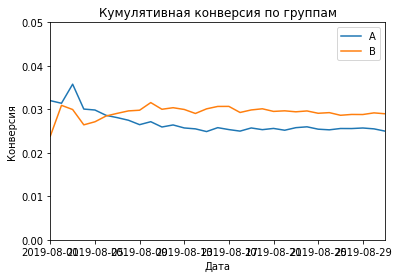

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]) 
plt.title("Кумулятивная конверсия по группам") 
plt.xlabel("Дата") 
plt.ylabel("Конверсия");

plt.show()

<div class="alert alert-info">
<b> </b>  
Группы колебались в первые дни, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
</div>

### График относительного изменения кумулятивной конверсии группы B к группе A

In [23]:
display(cumulativeDataA.head())
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,59758,713,0.023843
3,2019-08-02,B,40,39,221801,1294,0.030912
5,2019-08-03,B,54,53,288850,1803,0.029950
7,2019-08-04,B,68,66,385740,2573,0.026428
9,2019-08-05,B,89,87,475648,3280,0.027134


In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


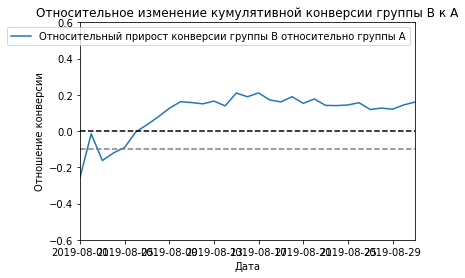

In [25]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]) 
plt.title("Относительное изменение кумулятивной конверсии группы В к А") 
plt.xlabel("Дата") 
plt.ylabel("Отношение конверсии");
plt.show()

<div class="alert alert-info">
<b> </b>  
В целом, конверсия группы В выше группы А, только в первые дни было иначе.
    
Прирост относительно группы А составляет 10-20 %.

</div>

### Точечный график количества заказов по пользователям

In [26]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [27]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


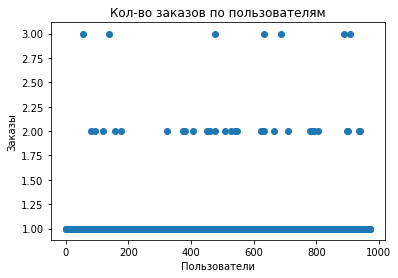

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Кол-во заказов по пользователям") 
plt.xlabel("Пользователи") 
plt.ylabel("Заказы");
plt.show()

<div class="alert alert-info">
<b> </b>  
Выводы подтверждаются: много пользователей с 1-3 заказами, а покупателей с 4 и более заказами – гораздо меньше. 
</div>

In [29]:
ordersByUsers_a = (
    orders.query('group == "A"').drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers_a.columns = ['userId', 'orders']
x_values_a = pd.Series(range(0,len(ordersByUsers_a)))

ordersByUsers_b = (
    orders.query('group == "B"').drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers_b.columns = ['userId', 'orders']
x_values_b = pd.Series(range(0,len(ordersByUsers_b)))



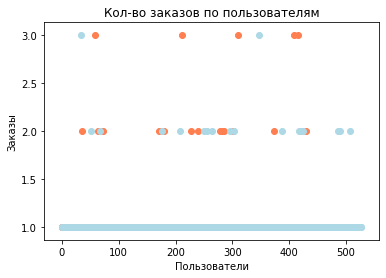

In [30]:
x = x_values_a
y = ordersByUsers_a['orders']

plt.scatter(x, y, c='coral')

x = x_values_b
y = ordersByUsers_b['orders']

plt.scatter(x, y, c='lightblue')

plt.title('Кол-во заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.show()

<div class="alert alert-info">
<b> </b>  
В группе В привалируют пользователи с одним заказом, а в А - с двумя, а покупателей с 4 и более заказами – гораздо меньше. 
</div>

### 95-й, 98-й, 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

In [31]:
np.percentile(ordersByUsers['orders'], [95, 98, 99])

array([1., 2., 2.])

<div class="alert alert-info">
<b> </b>  
Не более 5% покупателей больше 2 заказов, не более 2% покупают больше 3-х заказов и не более 1%  - больше 4 заказов.
Выберем 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней. 
</div>

### Точечный график стоимостей заказов

In [32]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


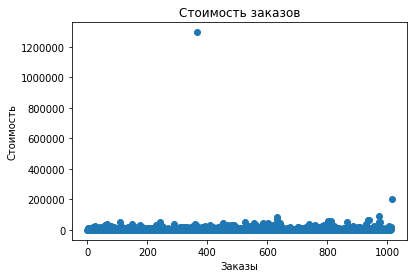

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

<div class="alert alert-info">
<b> </b>  
Всё, как предполагалось: есть немного дорогих заказов. 

</div>

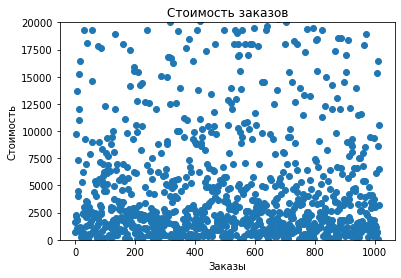

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.ylim([0, 20000])
plt.show()

<div class="alert alert-info">
<b> </b>  
Большая часть заказов до 2500-3000. 

</div>

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<div class="alert alert-info">
<b> </b>  
Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,20 рублей.
    
Если смотреть в целом на график и перцентили, можно выбрать границу аномальных заказов - 28 000 рублей

</div>

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsADaily.head()


,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [37]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [38]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [39]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [40]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [41]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [42]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [43]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [44]:
#Посчитаем статистическую значимость различия в конверсии между группами.
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

display(ordersByUsersA.head())
ordersByUsersB.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [45]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули
#в sampleA содержится выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. 
#Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. 
#Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — 
#найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
#Выведем относительный прирост конверсии группы B: 
#конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



In [46]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [47]:
print(sampleA.mean())
sampleB.mean()

0.02497865072587532


0.02897018397124128

<div class="alert alert-info">
<b>Конверсия группы А = 0,025, группы В = 0,029. Конверсии в группах различаются. </b>  
    
- Предположим что это могло произойти случайно.
    
- Пусть нулевая гипотеза звучит так - разница в конверсиях группы А и В НЕ является статистически значимой
    
- Альтернативная  - разница в конверсиях группы А и В является статистически значимой    
</div>

In [48]:
print("{0:.3f}".format(sps.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


<div class="alert alert-info">
<b></b>     
    
По «сырым» данным различия в конверсии групп A и B есть.
    
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии 
    
между группами нет, отвергаем. Относительный выигрыш группы B равен 16% относительно группы А.


</div>

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [49]:
print(orders[orders['group']=='A']['revenue'].mean())
orders[orders['group']=='B']['revenue'].mean()

7189.4358974358975


9249.94890510949

<div class="alert alert-info">
<b>Средний чек группы А = 7189, группы В = 9250. Средние чеки в группах различаются. </b>  
    
- Предположим что это могло произойти случайно.
    
- Пусть нулевая гипотеза звучит так - разница в средних чеках группы А и В НЕ является статистически значимой
    
- Альтернативная  - разница в средних чеках группы А и В является статистически значимой  
    
  
</div>

In [50]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, 
#передадим критерию mannwhitneyu() данные о выручке с заказов.
#А ещё найдём относительные различия в среднем чеке между группами


print('{0:.3f}'.format(sps.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.829
0.287


<div class="alert alert-info">
<b> </b>  
По «сырым» данным статистически значимых различий в среднем чеке нет.
P-value значительно больше 0.05. 
    
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
    
Но средний чек группы B значительно выше среднего чека группы A, а именно на 29%.


</div>

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [51]:
#Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 рублей. 
#Так мы уберём пользователей с наибольшим числом заказов и пользователей с дорогими заказами. 
#Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, 
#совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
#Узнаем, сколько всего аномальных пользователей методом shape().

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 


1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: userId, dtype: int64
(48,)


In [52]:
#Сначала подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [53]:
print(sampleAFiltered.mean())
sampleBFiltered.mean()

0.023778988992198356


0.027633668607728958

<div class="alert alert-info">
<b>Конверсия группы А = 0,024, группы В = 0,028. Конверсии в группах различаются, но уже меньше чем по сырым данным. </b>  
    
- Предположим что это могло произойти случайно.
    
- Пусть нулевая гипотеза звучит так - разница в конверсиях группы А и В "по очищенным данным" НЕ является статистически значимой
    
- Альтернативная  - разница в конверсиях группы А и В "по очищенным данным" является статистически значимой  
</div>

In [54]:
print('{0:.3f}'.format(sps.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.013
0.162


<div class="alert alert-info">
<b> </b>  
По «очищенным» данным статистически значимые различия в конверсии групп A и B есть.
    
Первое число — p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 16,2 % относительно группы А.

Результаты совпадают с "сырыми" данными.

</div>

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [55]:
print(
    '{0:.3f}'.format(
        sps.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


0.862
-0.028


In [56]:
orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()

5167.413483146068

In [57]:
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()

5025.252873563219

<div class="alert alert-info">
<b>Средний чек по очищенным данным группы А = 5167, группы В = 5025. Средние чеки в группах различаются немного. </b>  
    
- Предположим что это могло произойти случайно.
    
- Пусть нулевая гипотеза звучит так - разница средних чеков группы А и В "по очищенным данным" НЕ является статистически значимой
    
- Альтернативная  - разница средних чеков группы группы А и В "по очищенным данным" является статистически значимой  
</div>

<div class="alert alert-info">
<b> </b>  
По «очищенным» данным статистически значимых различий в среднем чеке нет.
P-value значительно больше 0.05. 
    
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
    
Но средний чек группы B на 1,7% ниже чека группы A.


</div>

## Решение по результатам теста 

<div class="alert alert-info">
<b>ВЫВОДЫ </b>  

**Данные в таблицах** корректные,  дубликатов и пустых значений нет.
Столбцы с датами переведены в нужный формат.
Приоритизация гипотез при применении RICE вместо ICE изменилась. Это произошло из-за влияния охвата пользователей.
Гипотеза № 7 вышла вперед, т.к. у нее максимальный охват пользователей - 10 баллов.

**График кумулятивной выручки:**
Кумулятивная выручка увеличивается в течение всего теста в обеих группах. Хороший знак. Однако график выручки группы В в одной точке резко растет, а дальше с таким же коэффициентом увеличивается как и в А. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке в определенный период.

**График кумулятивного среднего чека:**
Средний чек группы А после снижения идет резко вверх и после небольшого снижения устанавливается равномерно.    
Средний чек группы В растет рывками, причем последний рывок достаточно резкий, а далее идет снижение.    
Возможно, в группу B переодически попадали крупные заказы. Но после этих заказов средний чек каждый раз падает.    
Средний кумулятивный чек группы В выше в большей части времени.   

В нескольких точках **график отношения средних чеков** между группами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!    
График сигнализирует о том, что гораздо чаще кумулятивный средний чек группы В больше, чем у А в некоторых случаях разница достигает 30- почти 50 %.

**График кумулятивной конверсии по группам:**
Группы колебались в первые дни, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

**График относительного изменения кумулятивной конверсии** группы B к группе A:
В целом, конверсия группы В выше группы А, только в первые дни было иначе.
Прирост относительно группы А составляет 10-20 %.

**Точечный график количества заказов по пользователям:**
Выводы подтверждаются: много пользователей с 1-3 заказами, а покупателей с 4 и более заказами – гораздо меньше. 

**95-й, 98-й, 99-й перцентили количества заказов на пользователя.** Граница для определения аномальных пользователей:
Не более 5% покупателей больше 2 заказов, не более 2% покупают больше 3-х заказов и не более 1%  - больше 4 заказов.
Выбрали 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеяли аномальных пользователей по ней.

**Точечный график стоимостей заказов:**

Всё, как предполагалось: есть немного дорогих заказов. 

**95-й и 99-й перцентили стоимости заказов.** Граница для определения аномальных заказов:
Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,20 рублей.    
Если смотреть в целом на график и перцентили, можно выбрать границу аномальных заказов - 28 000 рублей

**Статистическая значимость различий в конверсии между группами по «сырым» данным:**
По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% относительно группы А.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:**
По «сырым» данным различий в среднем чеке нет.
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но средний чек группы B значительно выше среднего чека группы A, а именно на 25%.



**Статистическая значимость различий в конверсии между группами по «очищенным» данным:**

По «очищенным» данным различия в конверсии групп A и B есть.
Первое число — p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 14.8% относительно группы А.

Результаты совпадают с "сырыми" данными.

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:**

По «очищенным» данным различий в среднем чеке нет.
P-value значительно больше 0.05.     
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Но средний чек группы B на 1,7% ниже чека группы A.
    
</div>    


<div class="alert alert-info">
<b> </b>  
    
•Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий.
    
•Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
    
•График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
    
•График различия среднего чека говорит о том, что гораздо чаще кумулятивный средний чек группы В больше, чем у А, а в некоторых случаях разница достигает от 30 до почти 50 %.
    
**Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как можно зафиксировать победу группы В.**


</div>